## 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

### Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
### Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)
### Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

# [作業目標]
- 試著讀取網頁上的圖片連結清單, 再以清單中網址讀取圖片

# [作業重點]
- 從網頁上讀取連結清單 (In[1], In[2])
- 從清單網址讀取圖片 (In[6]~In[9], Out[6]~Out[9])

In [1]:
## 假如我們不想把資料載到自己的電腦裡?
# 把連結填入
target_url = 'https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt'

In [2]:
import requests
response = requests.get(target_url)
data = response.text

# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))


784594


In [3]:
data[-200:-1]

'02_5208\thttp://3.bp.blogspot.com/_9T2cRtlgHV0/SK55RHaybXI/AAAAAAAAAwY/VuzoyOGFARQ/s400/Eleni-Andriola-of-Greece4.jpg\nn00433802_5211\thttp://www.loudoungymnastics.com/images/Girls_doing_split%20jpg.jpg'

In [4]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
split_tag = '\n'

data = data.split(split_tag)
print(len(data))
data[0]

9996


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg'

In [5]:
data[-1]

''

In [6]:
data[-2]

'n00433802_5211\thttp://www.loudoungymnastics.com/images/Girls_doing_split%20jpg.jpg'

In [7]:
data = data[:-1]

In [8]:
data[-1]

'n00433802_5211\thttp://www.loudoungymnastics.com/images/Girls_doing_split%20jpg.jpg'

## 將 txt 轉成 pandas dataframe

In [9]:
import pandas as pd
arrange_data = []
for i in range(len(data)):
    arrange_data.append(data[i].split('\t'))
    if i == 0:
        print(arrange_data[0])
    

['n00015388_157', 'http://farm1.static.flickr.com/145/430300483_21e993670c.jpg']


In [10]:
type(arrange_data[0])

list

In [11]:
df = pd.DataFrame(arrange_data)
df.head()

,0,1
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
2,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...


## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

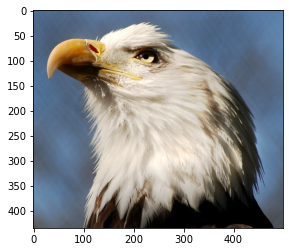

In [12]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

# 請用 df.loc[...] 得到第一筆資料的連結
first_link = df.loc[0,1]

response = requests.get(first_link)
img = Image.open(BytesIO(response.content))

# Convert img to numpy array

plt.imshow(img)
plt.show()

In [13]:
def img2arr_fromURLs(url_list, resize = False):
    
    img_list=[]
    for url in url_list:
        print(url)
        try:
            response = requests.get(url)
            img = Image.open(BytesIO(response.content))
            img_list.append(img)
        except:
            print('problem to get image',url)
    return img_list

http://farm2.static.flickr.com/1128/1432436038_6c131f1bb0.jpg
http://farm4.static.flickr.com/3217/2942611930_d68204f726.jpg
http://farm1.static.flickr.com/29/54608382_ee8bd4f7fa.jpg
http://www.dierentuin.nl/images/jongengiraffe.jpg
problem to get image http://www.dierentuin.nl/images/jongengiraffe.jpg
http://farm4.static.flickr.com/3279/3118047175_259ab89c92.jpg
problem to get image http://farm4.static.flickr.com/3279/3118047175_259ab89c92.jpg
https://w3f7yg.bay.livefilestore.com/y1miLTQmcuoRakgVwM6_bngzVE6TzzugspJiu6zK1_8F_kAD0tLiNV6nRNu9gQjci3MNbubrk3M8pSQlHpG3a8NO88Qx4dvvuugxBvdzeYg1j4KQk45GZIrKYpqxRxRMhCWK3PxXknn61E/IMG_4991斑马.jpg
problem to get image https://w3f7yg.bay.livefilestore.com/y1miLTQmcuoRakgVwM6_bngzVE6TzzugspJiu6zK1_8F_kAD0tLiNV6nRNu9gQjci3MNbubrk3M8pSQlHpG3a8NO88Qx4dvvuugxBvdzeYg1j4KQk45GZIrKYpqxRxRMhCWK3PxXknn61E/IMG_4991斑马.jpg
http://farm4.static.flickr.com/3271/2496428562_90b5cb82a6.jpg
http://farm2.static.flickr.com/1115/703274169_5ef9b9dfc9.jpg
http://farm1.stati

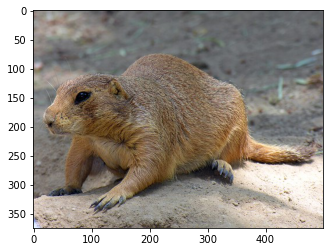

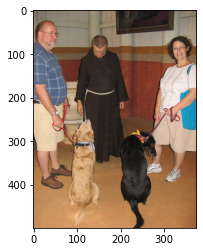

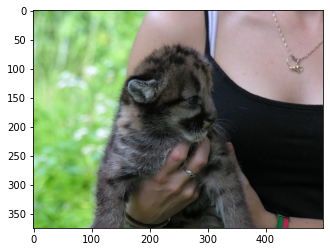

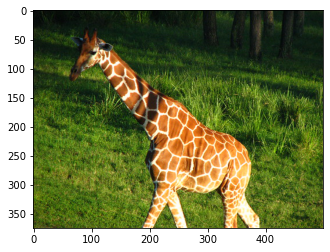

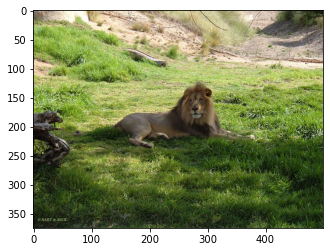

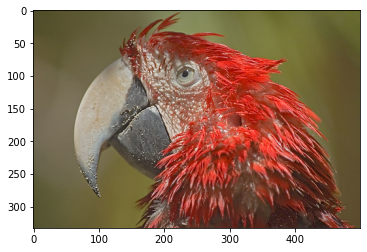

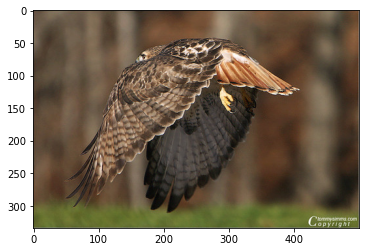

In [14]:
result = img2arr_fromURLs(df[10:20][1].values)
print("Total images that we got: %i " % len(result)) # 如果不等於 10, 代表有些連結失效囉

for im_get in result:
    plt.imshow(im_get)
    plt.show()